In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the Excel file into a DataFrame
excel_file_path = 'C:/Users/baha eddine/Desktop/PCD2/Multiphased_feature_selection/Wilcoxon Rank sum test/DS_after_Wilcoxon_with_only_Prev.xlsx'
df = pd.read_excel(excel_file_path)


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753 entries, 0 to 4752
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LCOM5                              4753 non-null   int64  
 1   NL                                 4753 non-null   int64  
 2   NLE                                4753 non-null   int64  
 3   WMC                                4753 non-null   int64  
 4   CBO                                4753 non-null   int64  
 5   CBOI                               4753 non-null   int64  
 6   NII                                4753 non-null   int64  
 7   NOI                                4753 non-null   int64  
 8   RFC                                4753 non-null   int64  
 9   CD                                 4753 non-null   float64
 10  CLOC                               4753 non-null   int64  
 11  DLOC                               4753 non-null   int64

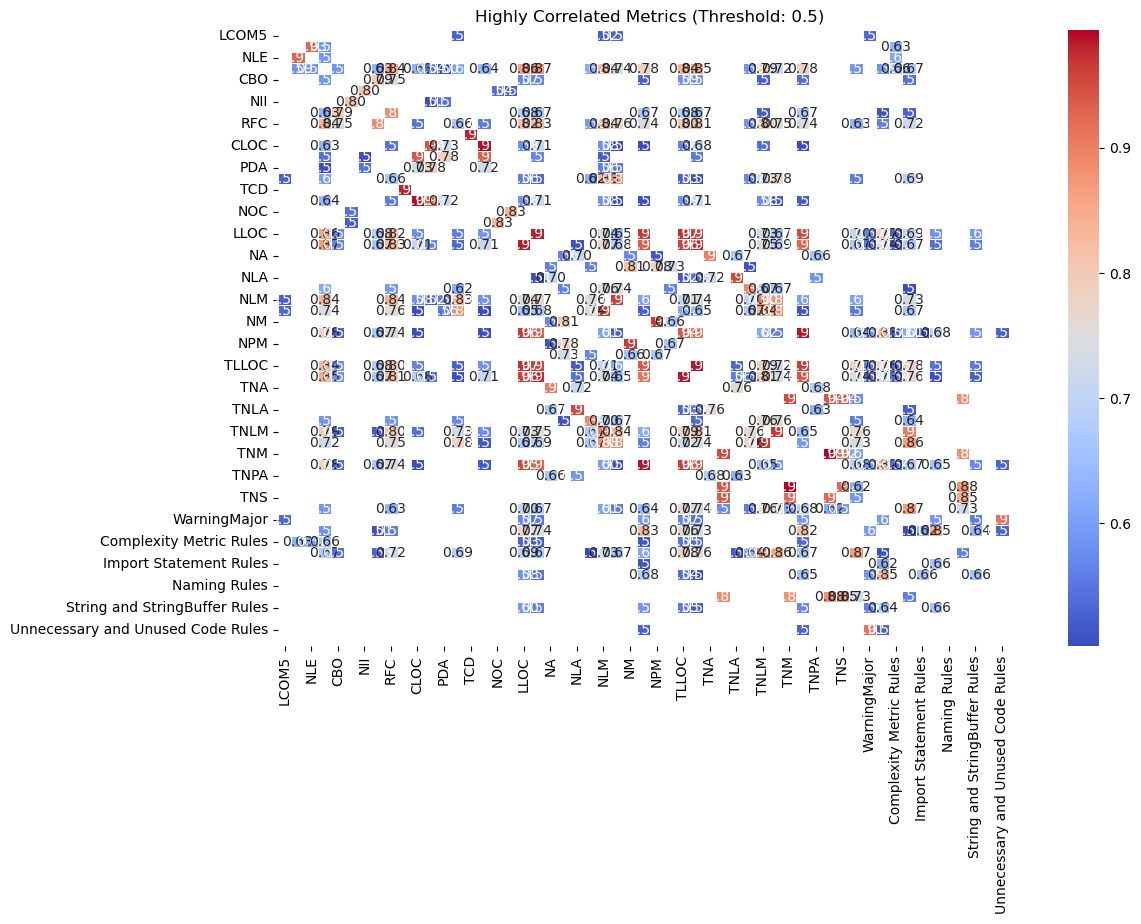

In [87]:
selected_columns=[]
# Calculate cross-correlations between metrics
for col in df.columns:
    if col not in ['Refact_Sum']:
        selected_columns.append(col)
        
cross_corr_matrix = df[selected_columns].corr()

# Set the correlation threshold (adjust as needed)
correlation_threshold = 0.5
import numpy as np 
# Create a mask to hide the upper triangle and diagonal for better visualization
mask = (cross_corr_matrix.abs() < correlation_threshold) | pd.DataFrame(np.eye(cross_corr_matrix.shape[0], dtype=bool), index=cross_corr_matrix.index, columns=cross_corr_matrix.columns)



# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_corr_matrix.mask(mask), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Highly Correlated Metrics (Threshold: {correlation_threshold})')
plt.show()

In [88]:
highly_correlated_features = []
feature_names = []

for i in range(len(cross_corr_matrix.columns)):
    for j in range(i+1, len(cross_corr_matrix.columns)):
        if abs(cross_corr_matrix.iloc[i, j]) >= correlation_threshold:
            feature1 = cross_corr_matrix.columns[i]
            feature2 = cross_corr_matrix.columns[j]
            correlation = cross_corr_matrix.iloc[i, j]
            if (feature2, feature1, correlation) not in highly_correlated_features:
                highly_correlated_features.append((feature1, feature2, correlation))
            feature_names.extend([feature1, feature2])

# Remove duplicates from feature_names
feature_names = list(set(feature_names))
# feature_names
highly_correlated_features

[('LCOM5', 'PUA', 0.5256332406871289),
 ('LCOM5', 'NLM', 0.524641284675139),
 ('LCOM5', 'NLPM', 0.5310083844628356),
 ('LCOM5', 'WarningMajor', 0.5341375428295941),
 ('NL', 'NLE', 0.9281503976178039),
 ('NL', 'WMC', 0.5856841647616868),
 ('NL', 'Complexity Metric Rules', 0.6316885099854853),
 ('NLE', 'WMC', 0.5885445753667236),
 ('NLE', 'Complexity Metric Rules', 0.608405492793181),
 ('WMC', 'CBO', 0.5868946752771458),
 ('WMC', 'NOI', 0.6322599086570653),
 ('WMC', 'RFC', 0.8422787622303443),
 ('WMC', 'CLOC', 0.6322670179111464),
 ('WMC', 'DLOC', 0.5405145003676128),
 ('WMC', 'PDA', 0.5038311292287547),
 ('WMC', 'PUA', 0.6023356636653108),
 ('WMC', 'TCLOC', 0.6360521871704287),
 ('WMC', 'LLOC', 0.8570332334756176),
 ('WMC', 'LOC', 0.8694402353352647),
 ('WMC', 'NLG', 0.6157305767625126),
 ('WMC', 'NLM', 0.8376830888632537),
 ('WMC', 'NLPM', 0.7417067584215045),
 ('WMC', 'NOS', 0.7839657915569966),
 ('WMC', 'TLLOC', 0.8360768432944682),
 ('WMC', 'TLOC', 0.8499508897658897),
 ('WMC', 'TNL

In [89]:
len(feature_names)

53

In [90]:
for col in df.columns:
    if col not in feature_names:
        df.drop(col,axis=1)
df        

,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,CD,...,Documentation Metric Rules,Import Statement Rules,JUnit Rules,Naming Rules,Size Metric Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,RMI,Refact_Sum
0,2,6,6,140,32,43,35,47,83,0.166407,...,79,0,0,17,17,0,0,0,-0.004691,0
1,1,0,0,4,3,1,1,1,5,0.640000,...,0,0,0,0,0,0,0,0,0.000752,0
2,1,2,2,45,5,1,0,5,15,0.365931,...,24,0,0,0,9,1,0,0,-0.000720,0
3,1,2,2,7,1,1,2,1,5,0.088889,...,11,0,0,0,2,0,0,0,0.000284,0
4,3,3,3,38,3,9,16,0,22,0.260870,...,33,0,0,3,7,0,0,0,-0.000655,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,5,4,4,23,3,0,0,0,10,0.496599,...,2,0,0,0,0,0,0,16,-0.000102,0
4749,3,1,1,8,1,0,0,0,5,0.325000,...,9,0,0,0,0,0,0,3,0.000070,0
4750,3,1,1,9,1,0,0,0,6,0.261905,...,11,0,0,0,0,0,0,3,0.000060,0
4751,3,3,2,9,0,0,0,0,4,0.492063,...,3,0,0,1,0,0,0,4,0.000076,0


In [91]:
# Save the DataFrame to an Excel file after Wilcoxon method
df.to_excel('C:/Users/baha eddine/Desktop/PCD2/Multiphased_feature_selection/Cross-correlation/DS_after_Correlation.xlsx', index=False)

In [92]:
# Extract the first elements from the list of tuples
first_elements = [pair[0] for pair in highly_correlated_features]
selec_columns=[]
# Count the occurrences of each element
element_counts = {element: first_elements.count(element) for element in set(first_elements)}

# Sort the dictionary by the counts in descending order
sorted_counts = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)

# Print the counts
for element, count in sorted_counts:
    print(f"{element} appeared {count} times corrolated to other metrics.")
#     if count >2 :
#         if element not in selec_columns:
#             selec_columns.append(element)
# print (selec_columns)            

WMC appeared 24 times corrolated to other metrics.
RFC appeared 18 times corrolated to other metrics.
LOC appeared 16 times corrolated to other metrics.
LLOC appeared 16 times corrolated to other metrics.
NOS appeared 14 times corrolated to other metrics.
CLOC appeared 12 times corrolated to other metrics.
TLOC appeared 12 times corrolated to other metrics.
PUA appeared 12 times corrolated to other metrics.
TLLOC appeared 12 times corrolated to other metrics.
TCLOC appeared 10 times corrolated to other metrics.
NLM appeared 10 times corrolated to other metrics.
NOI appeared 10 times corrolated to other metrics.
CBO appeared 10 times corrolated to other metrics.
NLPM appeared 9 times corrolated to other metrics.
TNOS appeared 8 times corrolated to other metrics.
NA appeared 7 times corrolated to other metrics.
NLG appeared 7 times corrolated to other metrics.
NG appeared 5 times corrolated to other metrics.
WarningMinor appeared 5 times corrolated to other metrics.
TNG appeared 5 times 

There is some metrics related to some specific frameworks and sum of multiple rules like ( Documentation Metric Rules, WarningMajor, WarningMinor...)

In [93]:
# we will drop these columns :
spec_Rules=['JUnit Rules','Documentation Metric Rules','Import Statement Rules','WarningInfo','WarningMajor','WarningMinor','Complexity Metric Rules','Naming Rules','Size Metric Rules','String and StringBuffer Rules','Type Resolution Rules','Unnecessary and Unused Code Rules']

In [94]:
df=df.drop(spec_Rules, axis=1)
df

,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,CD,...,TNLG,TNLM,TNLPM,TNM,TNOS,TNPA,TNPM,TNS,RMI,Refact_Sum
0,2,6,6,140,32,43,35,47,83,0.166407,...,5,40,36,40,336,30,36,0,-0.004691,0
1,1,0,0,4,3,1,1,1,5,0.640000,...,0,4,4,4,4,0,4,0,0.000752,0
2,1,2,2,45,5,1,0,5,15,0.365931,...,7,13,8,49,123,27,40,0,-0.000720,0
3,1,2,2,7,1,1,2,1,5,0.088889,...,1,4,4,26,19,5,26,0,0.000284,0
4,3,3,3,38,3,9,16,0,22,0.260870,...,2,22,22,22,61,5,22,0,-0.000655,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,5,4,4,23,3,0,0,0,10,0.496599,...,0,10,10,18,52,0,16,3,-0.000102,0
4749,3,1,1,8,1,0,0,0,5,0.325000,...,0,5,4,5,13,0,4,0,0.000070,0
4750,3,1,1,9,1,0,0,0,6,0.261905,...,1,6,5,6,15,0,5,0,0.000060,0
4751,3,3,2,9,0,0,0,0,4,0.492063,...,0,4,4,4,18,0,4,0,0.000076,0


In [95]:
# Save the DataFrame to an Excel file after Wilcoxon method
df.to_excel('C:/Users/baha eddine/Desktop/PCD2/Multiphased_feature_selection/Cross-correlation/DS_after_Correlation_final.xlsx', index=False)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753 entries, 0 to 4752
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LCOM5       4753 non-null   int64  
 1   NL          4753 non-null   int64  
 2   NLE         4753 non-null   int64  
 3   WMC         4753 non-null   int64  
 4   CBO         4753 non-null   int64  
 5   CBOI        4753 non-null   int64  
 6   NII         4753 non-null   int64  
 7   NOI         4753 non-null   int64  
 8   RFC         4753 non-null   int64  
 9   CD          4753 non-null   float64
 10  CLOC        4753 non-null   int64  
 11  DLOC        4753 non-null   int64  
 12  PDA         4753 non-null   int64  
 13  PUA         4753 non-null   int64  
 14  TCD         4753 non-null   float64
 15  TCLOC       4753 non-null   int64  
 16  NOC         4753 non-null   int64  
 17  NOD         4753 non-null   int64  
 18  LLOC        4753 non-null   int64  
 19  LOC         4753 non-null  